In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import SimpleITK as sitk
from tqdm import tqdm
from timeit import default_timer as timer
from data_tools.itk import *
plt.rcParams["figure.figsize"] = (20,5)
sitk.ProcessObject_SetGlobalWarningDisplay(False)

In [3]:
# get data dir
TRAIN_DIR = "./data/train/" 
IMAGE_DIRS = get_dir_dict(TRAIN_DIR)

In [4]:
def mean_spacings(series_list):
    x_dim = []
    y_dim = [] 
    z_dim = []
    # sitk read all flair images and rotate
    for i in tqdm(series_list):
        # read sitk image 
        image = read_dicom_series(i)
        # rotate image
        image = rotate_image(image)
        # get spacings 
        sx, sy, sz = image.GetSpacing()

        x_dim.append(sx)
        y_dim.append(sy)
        z_dim.append(sz)
    return np.mean(x_dim), np.mean(y_dim), np.mean(z_dim)
    

In [5]:
mean_spacings(IMAGE_DIRS["flair"])

100%|████████████████████████████████████████████████████████| 585/585 [01:17<00:00,  7.58it/s]


(0.7121478558063163, 0.8886607742498911, 2.4320288976061724)

In [6]:
mean_spacings(IMAGE_DIRS["t1w"])

100%|████████████████████████████████████████████████████████| 585/585 [00:49<00:00, 11.73it/s]


(0.8630510661421857, 0.7675369660980376, 2.631836211367285)

In [7]:
mean_spacings(IMAGE_DIRS["t1wce"])

100%|████████████████████████████████████████████████████████| 585/585 [03:10<00:00,  3.08it/s]


(0.8768679856749232, 0.884927486136288, 1.7342040534353473)

In [8]:
mean_spacings(IMAGE_DIRS["t2w"])

100%|████████████████████████████████████████████████████████| 585/585 [06:25<00:00,  1.52it/s]


(0.6834752597955375, 0.7160193959823881, 2.5539125597552883)

In [9]:
os.path.basename(os.path.dirname(IMAGE_DIRS["flair"][0]))

'00494'

In [21]:
this = np.load("./processed/train/00122/FLAIR.npy", allow_pickle=True)

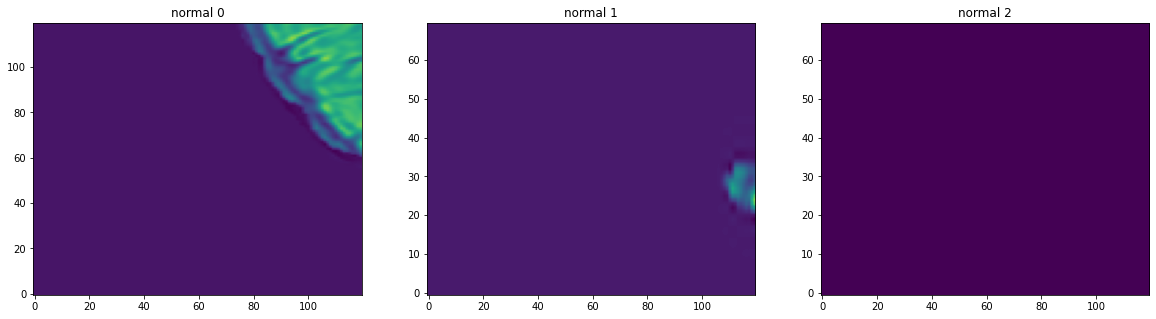

In [22]:
that = sitk.GetImageFromArray(this)
show_image(that)